In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.api as sm
import plotly.express as px
import plotly.io as pio
import plotly.figure_factory as ff
import warnings
import math

from plotly.offline import init_notebook_mode, iplot
from scipy import stats
from statsmodels.formula.api import ols, gls


warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
pio.templates.default = "plotly_dark"
matplotlib.rcParams['figure.dpi'] = 120


schooldata = pd.read_csv("../data/schooldata.csv")
# make factor CLASS categorical
schooldata["CLASS"] = schooldata["CLASS"].astype("object")
# Use diff_a as the difference in langs.
schooldata["diff_a"] = schooldata["POST_LANG"] - schooldata["PRE_LANG"]

# remove missing data
schooldata = schooldata[~schooldata["diff_a"].isna()]
print(schooldata.shape)
schooldata.head()

(3587, 17)


,SCHOOL,CLASS,CHILD,COMBI,SIZE,SSES,GIRL,MINORITY,SITTERS,CSES,IQV,IQP,PRE_LANG,POST_LANG,PRE_ARITH,POST_ARITH,diff_a
1,1,180,2,0.0,29.0,11.0,1.0,1,0.0,NaN,14.0,14.333333,44.0,50.0,18.0,30.0,6.0
2,1,180,3,0.0,29.0,11.0,0.0,0,0.0,23.0,15.0,12.330000,36.0,46.0,14.0,24.0,10.0
3,1,180,4,0.0,29.0,11.0,0.0,1,0.0,10.0,14.5,10.000000,36.0,45.0,12.0,19.0,9.0
4,1,180,5,0.0,29.0,11.0,0.0,0,0.0,15.0,9.5,11.000000,33.0,33.0,10.0,24.0,0.0
5,1,180,6,0.0,29.0,11.0,0.0,0,0.0,23.0,11.0,10.000000,29.0,46.0,13.0,26.0,17.0


# ANOVA (ANalysis Of VAriance)

- ANOVA test used to compare the means of more than 2 groups (t-test can be used to compare 2 groups)
- Groups mean differences inferred by analyzing variances
- ANOVA uses variance-based F test to check the group mean equality. Sometimes, ANOVA F test is also called omnibus test as it tests non-specific null hypothesis i.e. all group means are equal
- Main types: One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable)
- If you have repeated measurements for treatments or time on same subjects, you should use Repeated Measure ANOVA

> Note: In ANOVA, group, factors, and independent variables are similar terms

## ANOVA Hypotheses

**Null hypothesis**: Groups means are equal (no variation in means of groups)
    
$H_0: μ_1=μ_2=…=μ_p$

Alternative hypothesis: At least, one group mean is different from other groups

$H_1$: All $μ$ are not equal

> The null hypothesis is tested using the omnibus test (F test) for all groups, which is further followed by post-hoc test to see individual group differences.

## ANOVA Assumptions

- Residuals (experimental error) are approximately normally distributed (Shapiro-Wilks test or histogram)
- Homoscedasticity or Homogeneity of variances (variances are equal between treatment groups) (Levene’s, Bartlett’s, or Brown-Forsythe test)
- Observations are sampled independently from each other (no relation in observations between the groups and within the groups) i.e., each subject should have only one response
- The dependent variable should be continuous. If the dependent variable is ordinal or rank (e.g. Likert item data), it is more likely to violate the assumptions of normality and homogeneity of variances. If these assumptions are violated, you should consider the non-parametric tests (e.g. Mann-Whitney U test, Kruskal-Wallis test).

# How ANOVA works

- Check sample sizes: equal number of observation in each group
- Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degrees of freedom (df) for a group
- Calculate Mean Square error (MSE) (SS error/df of residuals)
- Calculate F value (MS of group/MSE)
- Calculate p value based on F value and degrees of freedom (df)

# ANOVA effect model, table, and formula

The ANOVA table represents **between** - and **within-group** sources of variation, and their associated degree of freedoms, the sum of squares ($SS$), and mean squares ($MS$). The total variation is the sum of between- and within-group variances. The $F$-value is a ratio of between- and within-group mean squares ($MS$). $p$-value is estimated from $F$-value and degree of freedoms.

<p align="center">
    $y_{ik} = \mu + \alpha_i + \epsilon_{ik}$
</p>

$SS_T = SS_B + SS_E$

Where $y_{ik} = k^{th}$ observation of $i^{th}$ level of groups,


# Distribution of diff_a by class

We can easily see that there are differences between classes.

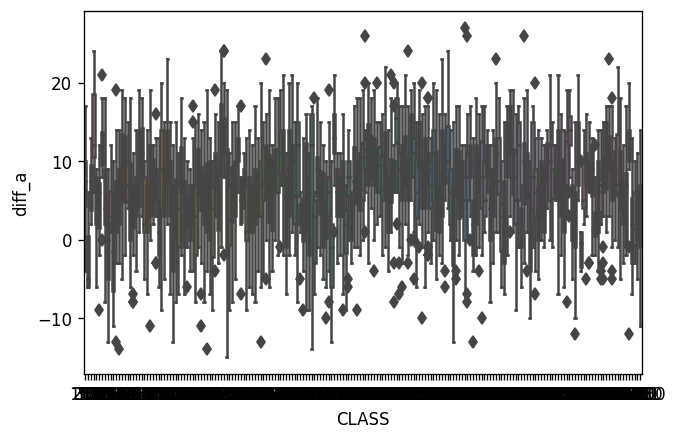

In [2]:
sns.boxplot(x="CLASS", y="diff_a", data=schooldata)
plt.show()

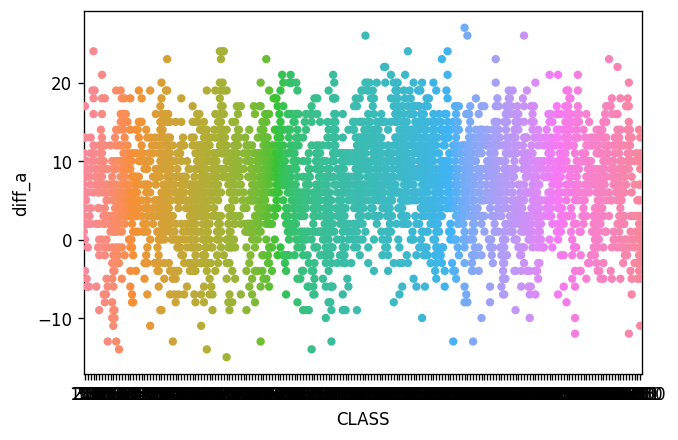

In [3]:
sns.swarmplot(x="CLASS", y="diff_a", data=schooldata)
plt.show()

# One Way ANOVA

## Generalised Least Squares (GLS)

We could also do Ordinary Least Squares (OLS), but since SAS uses GLS, we will do GLS here as well so that results can be compared.

In [4]:
model = gls("diff_a ~ C(CLASS)", data=schooldata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                 diff_a   R-squared:                       0.240
Model:                            GLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     5.469
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.57e-100
Time:                        10:15:51   Log-Likelihood:                -11182.
No. Observations:                3587   AIC:                         2.276e+04
Df Residuals:                    3390   BIC:                         2.398e+04
Df Model:                         196                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.9231      1.103      6.278      0.000       4.761       9.085
C(CLASS)[T.280]      -9.2088      2.394     -3.846      0.000     -13.903      -4.515
C(CLASS)[T.380]       0.2019      2.273      0.089      0.929      -4.255       4.659
C(CLASS)[T.982]       7.2587      2.022      3.589      0.000       3.294      11.224
C(CLASS)[T.1082]     -2.9231      2.746     -1.065      0.287      -8.306       2.460
C(CLASS)[T.1280]     -2.6106      1.787     -1.461      0.144      -6.113       0.892
C(CLASS)[T.1380]      4.9341      1.864      2.647      0.008       1.280       8.589
C(CLASS)[T.1480]     -2.8755      1.650     -1.743      0.081      -6.110       0.359
C(CLASS)[T.1580]     -6.8120      2.175     -3.133      0.002     -11.075      -2.548
C(CLASS)[T.1680]     -2.4231      2.273     -1.066      0.287      -6.880       2.034
C(CLASS)[T.1880]     -7.5481      1.592     -4.742      0.000     -10.669      -4.428
C(CLASS)[T.1980]     -2.4856      1.485     -1.674      0.094      -5.396       0.425
C(CLASS)[T.2180]     -2.9786      1.724     -1.728      0.084      -6.359       0.402
C(CLASS)[T.2380]      1.5552      1.609      0.966      0.334      -1.600       4.711
C(CLASS)[T.2480]      1.9936      1.592      1.253      0.210      -1.127       5.114
C(CLASS)[T.2580]      1.0000      1.910      0.524      0.601      -2.745       4.745
C(CLASS)[T.2680]     -1.9786      1.724     -1.148      0.251      -5.359       1.402
C(CLASS)[T.2780]     -3.8361      1.609     -2.383      0.017      -6.992      -0.680
C(CLASS)[T.2880]     -1.2172      1.754     -0.694      0.488      -4.656       2.221
C(CLASS)[T.2980]      2.3769      2.092      1.136      0.256      -1.725       6.479
C(CLASS)[T.3080]      3.7769      2.092      1.805      0.071      -0.325       7.879
C(CLASS)[T.3180]     -3.4685      2.022     -1.715      0.086      -7.434       0.497
C(CLASS)[T.3280]     -2.6850      1.650     -1.628      0.104      -5.919       0.549
C(CLASS)[T.3380]     -0.0659      2.394     -0.028      0.978      -4.760       4.628
C(CLASS)[T.3480]     -0.2564      2.547     -0.101      0.920      -5.249       4.736
C(CLASS)[T.3580]     -0.2088      1.864     -0.112      0.911      -3.863       3.446
C(CLASS)[T.3680]     -4.9231      1.575     -3.126      0.002      -8.011      -1.835
C(CLASS)[T.3780]      1.5252      1.519      1.004      0.315      -1.452       4.503
C(CLASS)[T.3880]     -1.1811      1.495     -0.790      0.430      -4.113       1.751
C(CLASS)[T.3980]      3.8547      1.545      2.495      0.013       0.826       6.884
C(CLASS)[T.4081]     -1.2431      1.575     -0.789      0.430      -4.331       1.845
C(CLASS)[T.4180]     -4.9231      1.910     -2.578      0.010      -8.668      -1.178
C(CLASS)[T.4280]     -3.4231      1.864     -1.837      0.066      -7.078

In [5]:
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,1246.153846,1.0,39.418134,3.855008e-10
C(CLASS),33888.116204,196.0,5.469099,1.570053e-100
Residual,107170.511619,3390.0,NaN,NaN


# TODO Intraclass Correlation Coefficient (ICC)

# Predictions of random effects

In [6]:
schooldata.loc[:, "pred"] = model.predict()
schooldata.loc[:, "residual"] = model.resid
schooldata.loc[:, "residual_pearson"] = model.resid_pearson
schooldata.head()

,SCHOOL,CLASS,CHILD,COMBI,SIZE,SSES,GIRL,MINORITY,SITTERS,CSES,IQV,IQP,PRE_LANG,POST_LANG,PRE_ARITH,POST_ARITH,diff_a,pred,residual,residual_pearson
1,1,180,2,0.0,29.0,11.0,1.0,1,0.0,NaN,14.0,14.333333,44.0,50.0,18.0,30.0,6.0,6.923077,-0.923077,-0.164172
2,1,180,3,0.0,29.0,11.0,0.0,0,0.0,23.0,15.0,12.330000,36.0,46.0,14.0,24.0,10.0,6.923077,3.076923,0.547241
3,1,180,4,0.0,29.0,11.0,0.0,1,0.0,10.0,14.5,10.000000,36.0,45.0,12.0,19.0,9.0,6.923077,2.076923,0.369388
4,1,180,5,0.0,29.0,11.0,0.0,0,0.0,15.0,9.5,11.000000,33.0,33.0,10.0,24.0,0.0,6.923077,-6.923077,-1.231293
5,1,180,6,0.0,29.0,11.0,0.0,0,0.0,23.0,11.0,10.000000,29.0,46.0,13.0,26.0,17.0,6.923077,10.076923,1.792215


# Interpretation

The $p$ value produced from the ANOVA analysis is significant ($p < 0.05$). Thus, we reject the null hypothesis and conclude that there are significant differences among classes.

> Note: from ANOVA we know that the classes performed differently, but we are not able to tell which classes are significantly different from each other. To know the pairs of significant different classes, we could perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

# TODO add BLUPs

In [7]:
schooldata_by_class = schooldata.groupby("CLASS").mean()
schooldata_by_class

,SCHOOL,CHILD,COMBI,SIZE,SSES,GIRL,MINORITY,SITTERS,CSES,IQV,IQP,PRE_LANG,POST_LANG,PRE_ARITH,POST_ARITH,diff_a,pred,residual,residual_pearson
CLASS,,,,,,,,,,,,,,,,,,,
180,1.0,14.500000,0.0,29.0,11.0,0.423077,0.615385,0.115385,13.840000,10.461538,10.204436,30.000000,36.923077,11.730769,19.000000,6.923077,6.923077,-4.205183e-14,-7.487600e-15
280,2.0,31.000000,1.0,19.0,11.0,0.428571,0.142857,0.428571,15.428571,9.000000,9.188714,26.000000,23.714286,8.142857,9.142857,-2.285714,-2.285714,6.014237e-14,1.070572e-14
380,3.0,39.500000,1.0,28.0,18.0,0.750000,0.000000,0.125000,28.500000,11.125000,10.291667,32.750000,39.875000,8.875000,17.625000,7.125000,7.125000,-5.861978e-14,-1.042222e-14
982,9.0,97.000000,0.0,23.0,NaN,0.181818,0.000000,0.272727,30.909091,12.772727,13.151515,31.272727,45.454545,12.181818,23.818182,14.181818,14.181818,-1.312889e-13,-2.334496e-14
1082,10.0,111.000000,1.0,25.0,15.0,0.600000,0.000000,0.000000,19.600000,10.500000,9.066400,26.400000,30.400000,8.000000,14.200000,4.000000,4.000000,-2.486900e-14,-4.418688e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25480,254.0,4144.590909,0.0,25.0,19.0,0.454545,0.000000,0.136364,25.809524,11.568182,11.227273,34.727273,45.818182,13.272727,22.727273,11.090909,11.090909,-2.583792e-15,-4.440892e-16
25680,256.0,4162.500000,1.0,32.0,11.0,0.500000,0.000000,0.000000,17.800000,10.550000,10.397900,27.500000,29.300000,8.800000,11.400000,1.800000,1.800000,-6.821210e-14,-1.212919e-14
25781,257.0,4171.500000,1.0,23.0,12.0,0.333333,0.500000,0.000000,18.166667,11.666667,10.222222,35.833333,38.500000,10.333333,17.333333,2.666667,2.666667,-3.848773e-15,-6.753857e-16


# Conditional Residuals for DIFF_A

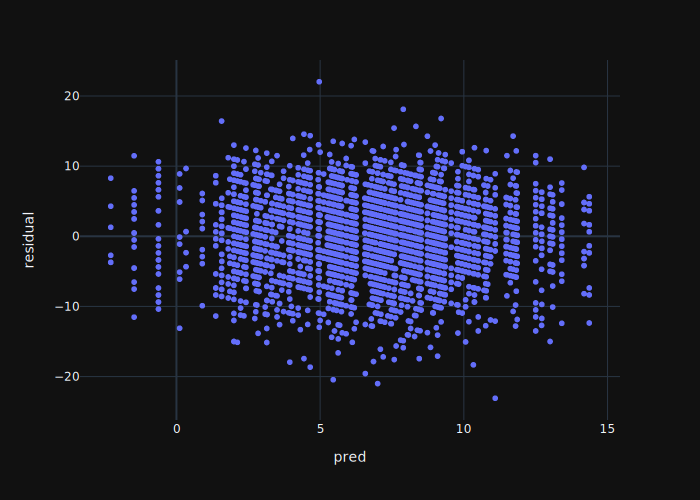

In [8]:
fig = px.scatter(data_frame=schooldata, x="pred", y="residual")
fig.show("svg")

# Testing ANOVA Assumptions

- ANOVA assumptions can be checked using test statistics (e.g. Shapiro-Wilk, Bartlett’s, Levene’s test, Brown-Forsythe test) and the visual approaches such as residual plots (e.g. QQ-plots) and histograms.

- The visual approaches perform better than statistical tests. For example, the Shapiro-Wilk test has low power for small sample size data and deviates significantly from normality for large sample sizes (say n > 50). For large sample sizes, you should consider to use QQ-plot for normality assumption.

[1] https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot

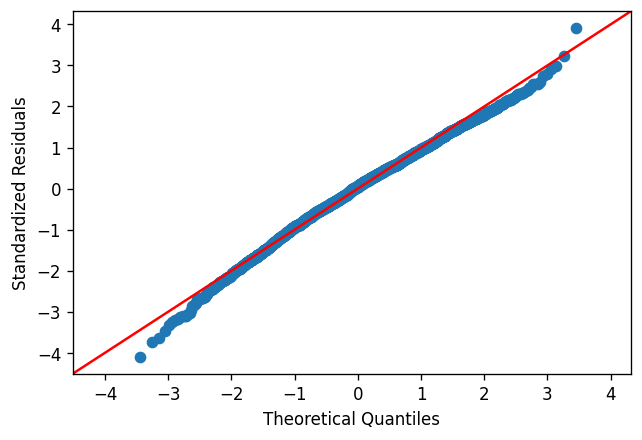

In [9]:
sm.qqplot(model.resid_pearson, line="45")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Interpretation

- As the standardized residuals lie around the 45-degree line, it suggests that the **residuals are approximately normally distributed**

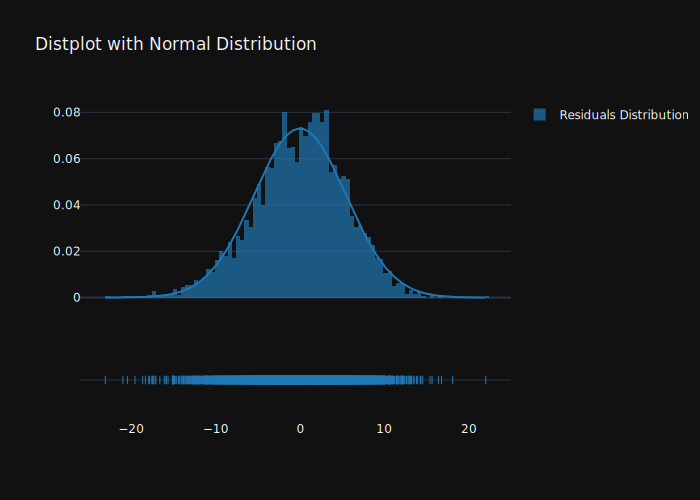

In [10]:
fig = ff.create_distplot(
    hist_data=list([model.resid]), 
    group_labels=["Residuals Distribution"], 
    bin_size=0.5, 
    curve_type="normal"
)

fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show("svg")

# Interpretation

- In the histogram, the distribution looks approximately normal and suggests that **residuals are approximately normally distributed**

# TODO CHECK ANALYSIS BELOW

# Shapiro-Wilk test

Shapiro-Wilk test can be used to check the normal distribution of residuals. Null hypothesis: data is drawn from normal distribution.

In [14]:
w, p_val = stats.shapiro(model.resid)
print(w, p_val)

0.9954769015312195 4.91335283570038e-09


# Intepretation

$p$-value is non significant ($p > 0.05$), hence we fail to reject the null hypothesis and conclude that data is drawn from normal distribution.

# Bartlett's test for Homogeneity of variances

As the data is **drawn from normal distribution**, use Bartlett's test to check the **Homogeneity of variances**. Here, we test the _null hypothesis_: samples from populations have equal variances.

In [12]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=schooldata, res_var="diff_a", anova_model="diff_a ~ C(CLASS)")
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(CLASS),196.0,33888.116204,172.898552,5.469099,1.570053e-100
Residual,3390.0,107170.511619,31.613720,NaN,NaN


In [13]:
res.bartlett(df=schooldata, res_var='diff_a', xfac_var='CLASS')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),187.7420
1,Degrees of freedom (Df),164.0000
2,p value,0.0987


As the $p$-value is non significant, we fail to reject the null hypothesis and conclude that classes have significant difference in the variances.

# Reference

[1] https://www.reneshbedre.com/blog/anova.html